# Data Analysis on Salary

## Importing Required Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

my_columns = ['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation', 'relationship', 'race',
             'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','salary']

print(my_columns)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']


## Loading and Inspecting the Dataset

 Removing `fnlwgt` as it does not provide meaningful information for this analysis.


In [175]:
filename =  'adult.data.txt'
data = pd.read_csv(filename)
data.columns = my_columns

data = data.drop(columns=['fnlwgt'])
data.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Initial Data Exploration

In [176]:
data['salary'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [177]:
data['salary'] = data['salary'].map({' <=50K': '<=50K', ' >50K': '>50K'})

In [178]:
data['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Strip whitespace from categorical values to avoid mismatches

In [179]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/1b/6lryqhs14m71h3pjsfcc6fdw0000gn/T/ipykernel_25097/3535808219.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Replace '?' (used for missing values) with `None`


In [180]:
data.replace('?', None, inplace=True)

In [181]:
data['workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', None, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [182]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [183]:
continuous_df = data.loc[:,['age','education-num','capital-gain','capital-loss','hours-per-week']]
continuous_list = ['age','education-num','capital-gain','capital-loss','hours-per-week']

negative_rows = continuous_df[(continuous_df < 0).any(axis=1)]
print(negative_rows)


Empty DataFrame
Columns: [age, education-num, capital-gain, capital-loss, hours-per-week]
Index: []


In [184]:
for column in continuous_list:
    print(f"{column}: Min = {continuous_df[column].min()}, Max = {continuous_df[column].max()}")

age: Min = 17, Max = 90
education-num: Min = 1, Max = 16
capital-gain: Min = 0, Max = 99999
capital-loss: Min = 0, Max = 4356
hours-per-week: Min = 1, Max = 99


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   education       32560 non-null  object
 3   education-num   32560 non-null  int64 
 4   marital-status  32560 non-null  object
 5   occupation      30717 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital-gain    32560 non-null  int64 
 10  capital-loss    32560 non-null  int64 
 11  hours-per-week  32560 non-null  int64 
 12  native-country  31977 non-null  object
 13  salary          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [186]:
data.mean(numeric_only=True)

age                 38.581634
education-num       10.080590
capital-gain      1077.615172
capital-loss        87.306511
hours-per-week      40.437469
dtype: float64

In [187]:
data.median(numeric_only=True)

age               37.0
education-num     10.0
capital-gain       0.0
capital-loss       0.0
hours-per-week    40.0
dtype: float64

In [188]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [189]:
data.isnull().mean()

age               0.000000
workclass         0.056388
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056603
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
salary            0.000000
dtype: float64

In [190]:
data.isna().sum() [data.isna().sum() > 0]

workclass         1836
occupation        1843
native-country     583
dtype: int64

### Feature Engineering
### Introducing numerical encoding for categorical data to facilitate further analysis.

In [191]:
data['salary_numeric'] = data['salary'].map({'>50K': 1, '<=50K': 0})
# data['native_country_encoded'] = data.groupby('native-country')['salary_numeric'].transform('mean')

### First visualization into the Data

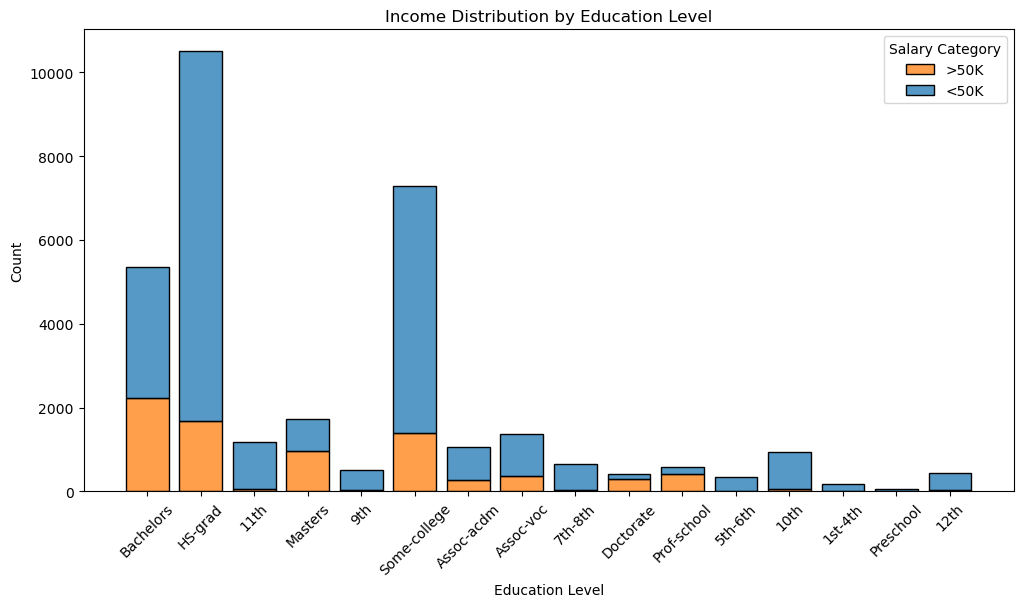

In [192]:
plt.figure(figsize=(12,6))

# Create histogram with the correct order
sns.histplot(data=data, x="education", hue="salary", multiple="stack", shrink=0.8)

# Improve labels
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Ensure legend appears
plt.legend(title="Salary Category", labels=[">50K", "<50K"])  

# Show plot
plt.show()

### Summary statistics of the dataset


In [193]:
data.nunique()

age                73
workclass           8
education          16
education-num      16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     41
salary              2
salary_numeric      2
dtype: int64

In [194]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary_numeric
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [195]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,30724,32560,32560,30717,32560,32560,32560,31977,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [196]:
data['native-country'].value_counts()

native-country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [197]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [198]:
data['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [199]:
data.groupby('salary', dropna=False).median(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,salary_numeric
salary,,,,,,
<=50K,34.0,9.0,0.0,0.0,40.0,0.0
>50K,44.0,12.0,0.0,0.0,40.0,1.0


In [200]:
data.groupby('salary',dropna=False).describe(include='object').reset_index()

salary workclass                        education                          \
             count unique      top   freq     count unique        top  freq   
0  <=50K     23074      8  Private  17733     24719     16    HS-grad  8826   
1   >50K      7650      6  Private   4963      7841     15  Bachelors  2221   

  marital-status  ...   race           sex                     native-country  \
           count  ...    top   freq  count unique   top   freq          count   
0          24719  ...  White  20698  24719      2  Male  15127          24282   
1           7841  ...  White   7117   7841      2  Male   6662           7695   

                                
  unique            top   freq  
0     41  United-States  21998  
1     39  United-States   7171  

[2 rows x 33 columns]

In [201]:
data.groupby('salary', dropna=False).\
aggregate(education_median = ('education-num', 'median'))

,education_median
salary,
<=50K,9.0
>50K,12.0


In [202]:
grouped_data = data.groupby(['education', 'education-num']).size().reset_index(name='count')
grouped_data.sort_values('education-num')

,education,education-num,count
13,Preschool,1,51
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
0,10th,6,933
1,11th,7,1175
2,12th,8,433
11,HS-grad,9,10501
15,Some-college,10,7291


### Categorizing Education Levels

In [203]:
education_mapping = {
    'Preschool': 'Non High School Grad',
    '1st-4th': 'Non High School Grad',
    '5th-6th': 'Non High School Grad',
    '7th-8th': 'Non High School Grad',
    '9th': 'Non High School Grad',
    '10th': 'Non High School Grad',
    '11th': 'Non High School Grad',
    '12th': 'Non High School Grad',
    'HS-grad': 'High School Graduate',
    'Some-college': 'Some College',
    'Assoc-acdm': 'Associate Degree',
    'Assoc-voc': 'Associate Degree',
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Professional School'
}

In [204]:
data['education_grouped'] = data['education'].str.strip().replace(education_mapping)

In [205]:
education_grouped_counts = data['education_grouped'].value_counts()
print(education_grouped_counts)

education_grouped
High School Graduate    10501
Some College             7291
Bachelors                5354
Non High School Grad     4253
Associate Degree         2449
Masters                  1723
Professional School       576
Doctorate                 413
Name: count, dtype: int64


### Define order for visualization


In [206]:
edu_order = [
    'Non High School Grad', 
    'High School Graduate', 
    'Some College', 
    'Associate Degree', 
    'Bachelors', 
    'Masters', 
    'Professional School', 
    'Doctorate'
]

# Ensure correct order in pandas
data['education_grouped'] = pd.Categorical(data['education_grouped'], categories=edu_order, ordered=True)

# Ensure education_grouped follows the correct order
data['education_grouped'] = pd.Categorical(data['education_grouped'], categories=edu_order, ordered=True)

### Second visualization - a different look

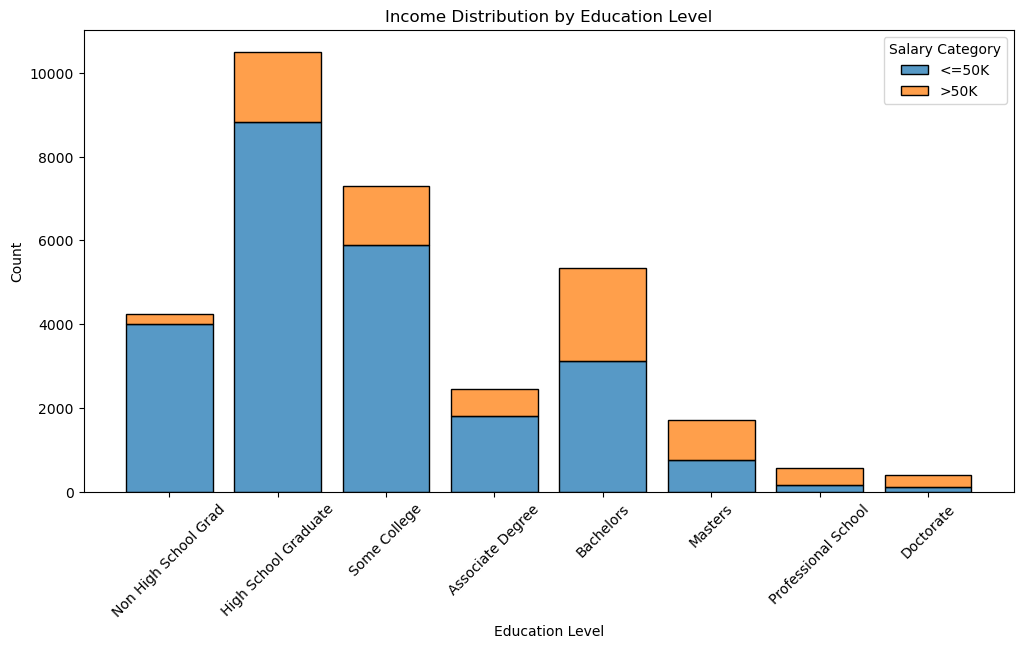

In [207]:
plt.figure(figsize=(12,6))

custom_palette = ["#ff7f0e", "#1f77b4"]  # Orange, Blue

# Create histogram with the correct order
sns.histplot(data=data, x="education_grouped", hue="salary", multiple="stack", shrink=0.8, hue_order=[">50K", "<=50K"], palette=custom_palette)

# Improve labels
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability



# Ensure legend appears
plt.legend(title="Salary Category", labels=["<=50K", ">50K"])  

# Show plot
plt.show()

### More summary statistics

In [208]:
print(data["salary"].value_counts())  # Check distribution of salary categories

salary
<=50K    24719
>50K      7841
Name: count, dtype: int64


In [209]:
print(data["salary"].unique())

['<=50K' '>50K']


In [210]:
low_income_summary = data[data['salary'] == '<=50K'].describe()
high_income_summary = data[data['salary'] == '>50K'].describe()

In [211]:
print(low_income_summary)

                age  education-num  capital-gain  capital-loss  \
count  24719.000000   24719.000000  24719.000000  24719.000000   
mean      36.783648       9.594927    148.670537     53.145071   
std       14.020365       2.436100    963.072640    310.761871   
min       17.000000       1.000000      0.000000      0.000000   
25%       25.000000       9.000000      0.000000      0.000000   
50%       34.000000       9.000000      0.000000      0.000000   
75%       46.000000      10.000000      0.000000      0.000000   
max       90.000000      16.000000  41310.000000   4356.000000   

       hours-per-week  salary_numeric  
count    24719.000000         24719.0  
mean        38.840163             0.0  
std         12.319242             0.0  
min          1.000000             0.0  
25%         35.000000             0.0  
50%         40.000000             0.0  
75%         40.000000             0.0  
max         99.000000             0.0  


In [212]:
print(high_income_summary)

               age  education-num  capital-gain  capital-loss  hours-per-week  \
count  7841.000000    7841.000000   7841.000000   7841.000000     7841.000000   
mean     44.249841      11.611657   4006.142456    195.001530       45.473026   
std      10.519028       2.385129  14570.378951    595.487574       11.012971   
min      19.000000       2.000000      0.000000      0.000000        1.000000   
25%      36.000000      10.000000      0.000000      0.000000       40.000000   
50%      44.000000      12.000000      0.000000      0.000000       40.000000   
75%      51.000000      13.000000      0.000000      0.000000       50.000000   
max      90.000000      16.000000  99999.000000   3683.000000       99.000000   

       salary_numeric  
count          7841.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  


In [213]:
data[data['salary'] == '<=50K'][['age', 'hours-per-week', 'capital-gain']].describe()


,age,hours-per-week,capital-gain
count,24719.000000,24719.000000,24719.000000
mean,36.783648,38.840163,148.670537
std,14.020365,12.319242,963.072640
min,17.000000,1.000000,0.000000
25%,25.000000,35.000000,0.000000
50%,34.000000,40.000000,0.000000
75%,46.000000,40.000000,0.000000
max,90.000000,99.000000,41310.000000


## Correlation Analysis

### Encoded using factorizing pandas method

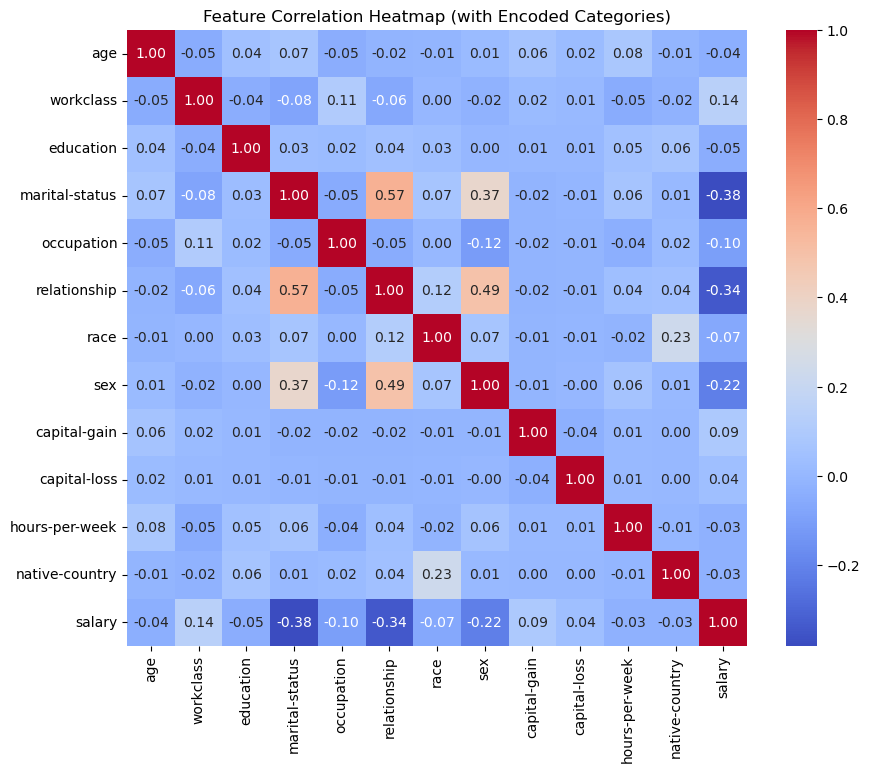

In [214]:
encoded_data = data.copy()
for col in data:
    encoded_data[col] = pd.factorize(encoded_data[col])[0]

encoded_data_filtered = encoded_data.drop(columns=['education-num', 'education_grouped', 'salary_numeric'])

plt.figure(figsize=(10,8))
sns.heatmap(encoded_data_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (with Encoded Categories)")
plt.show()

### Plotting correlation against salary

In [215]:
# Compute correlation matrix
corr_matrix = encoded_data_filtered.corr()
# Convert to Series and sort values
corr_series = corr_matrix.unstack().sort_values(ascending=False)

# Extract correlations of all features with salary
salary_corr = corr_matrix['salary'].sort_values(ascending=False)

salary_corr = salary_corr.drop('salary')

print("\nTop 3 positive")
print(salary_corr.head(3))

print("\nTop 5 negative")
print(salary_corr.tail(5))

salary_corr = abs(salary_corr).sort_values(ascending=False)

print("\nTop absolute")

print(salary_corr)


Top 3 positive
workclass       0.140577
capital-gain    0.089919
capital-loss    0.038590
Name: salary, dtype: float64

Top 5 negative
race             -0.067720
occupation       -0.102272
sex              -0.215995
relationship     -0.342172
marital-status   -0.381245
Name: salary, dtype: float64

Top absolute
marital-status    0.381245
relationship      0.342172
sex               0.215995
workclass         0.140577
occupation        0.102272
capital-gain      0.089919
race              0.067720
education         0.046237
capital-loss      0.038590
age               0.037873
hours-per-week    0.029797
native-country    0.027817
Name: salary, dtype: float64


          variable  salary_correlation
0   marital-status            0.381245
1     relationship            0.342172
2              sex            0.215995
3        workclass            0.140577
4       occupation            0.102272
5     capital-gain            0.089919
6             race            0.067720
7        education            0.046237
8     capital-loss            0.038590
9              age            0.037873
10  hours-per-week            0.029797
11  native-country            0.027817


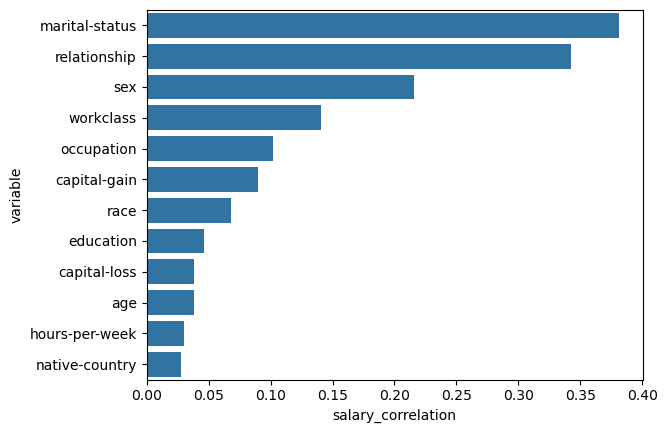

In [216]:
salary_corr_df = pd.DataFrame(salary_corr).reset_index()
salary_corr_df.columns = ['variable', 'salary_correlation']  # Rename columns explicitly


print(salary_corr_df)

sns.barplot(salary_corr_df, x='salary_correlation', y='variable')


plt.show()

In [217]:
data_onehot_prep = data.drop(columns=['education-num', 'education']).copy()

encoded_data_onehot = pd.get_dummies(data_onehot_prep, drop_first=True)

print(encoded_data_onehot.columns)




Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'salary_numeric', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relat


10 Positive Factors
                                Variable  Correlation
0      marital-status_Married-civ-spouse     0.444688
1                                    age     0.234039
2                         hours-per-week     0.229690
3                           capital-gain     0.223333
4                               sex_Male     0.215995
5             occupation_Exec-managerial     0.214856
6              occupation_Prof-specialty     0.185861
7            education_grouped_Bachelors     0.180539
8              education_grouped_Masters     0.174567
9  education_grouped_Professional School     0.154905

10 Negative Factors
marital-status_Never-married             -0.318427
relationship_Own-child                   -0.228541
relationship_Not-in-family               -0.188477
occupation_Other-service                 -0.156355
relationship_Unmarried                   -0.142864
education_grouped_High School Graduate   -0.131202
race_Black                               -0.089095
occupat

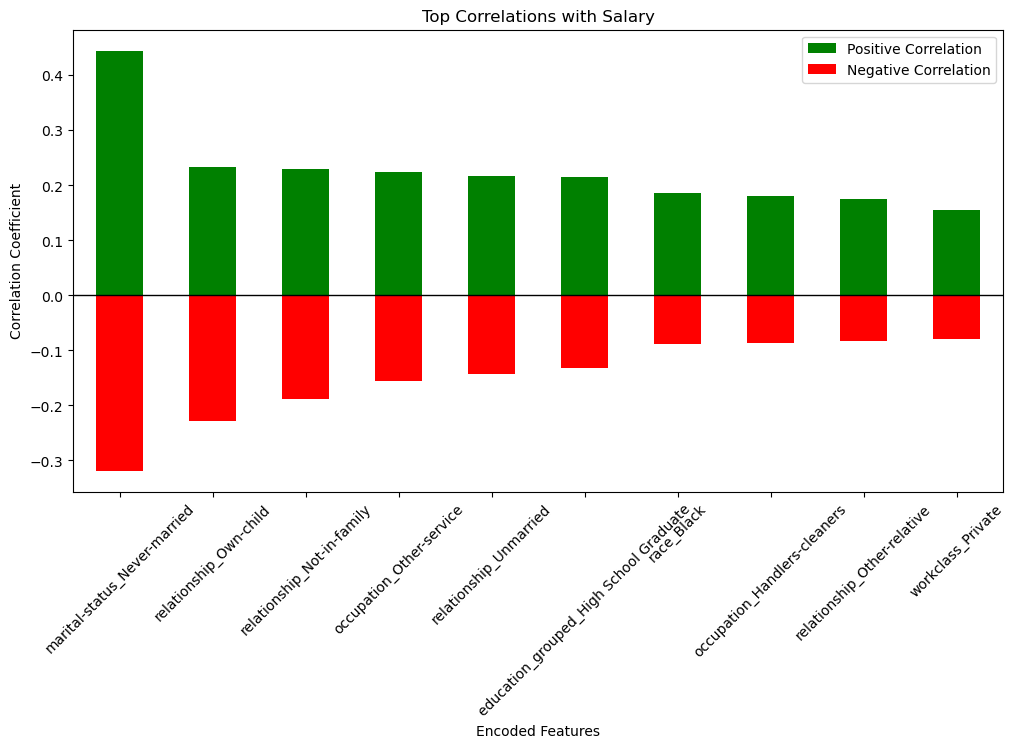

In [218]:
# Compute correlation with salary
salary_corr = encoded_data_onehot.corr()['salary_numeric'].sort_values(ascending=False)

print("\n10 Positive Factors")
pos = pd.DataFrame(salary_corr.drop("salary_numeric").drop("salary_>50K").nlargest(10)).reset_index()
pos.columns=['Variable','Correlation']

print(pos)


print("\n10 Negative Factors")
neg = salary_corr.drop("salary_numeric").drop("salary_>50K").nsmallest(10)
neg.columns=['Variable','Correlation']

print(neg)


# Plot top 10 positive & negative correlations
plt.figure(figsize=(12, 6))
salary_corr.drop("salary_numeric").drop("salary_>50K").nlargest(10).plot(kind='bar', color='green', label='Positive Correlation')
salary_corr.drop("salary_numeric").nsmallest(10).plot(kind='bar', color='red', label='Negative Correlation')

# Improve layout
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.title("Top Correlations with Salary")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Encoded Features")
plt.xticks(rotation=45)
plt.show()

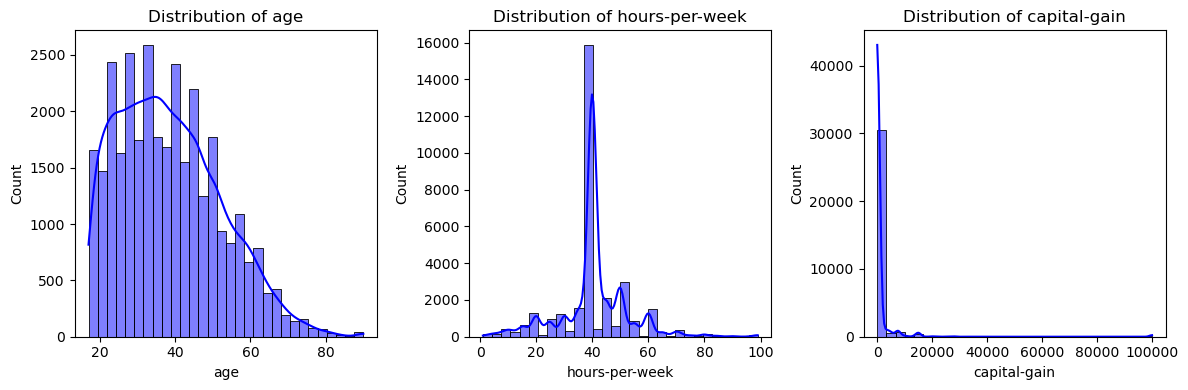

In [219]:
# Define numerical columns of interest
num_cols = ['age', 'hours-per-week', 'capital-gain']

# Plot histograms
plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

0              0
1              0
2              0
3              0
4              0
          ...   
32555          0
32556          0
32557          0
32558          0
32559    15,000+
Name: capital-gain-bins, Length: 32560, dtype: category
Categories (4, object): ['0' < '<5,000' < '5,000-15,000' < '15,000+']


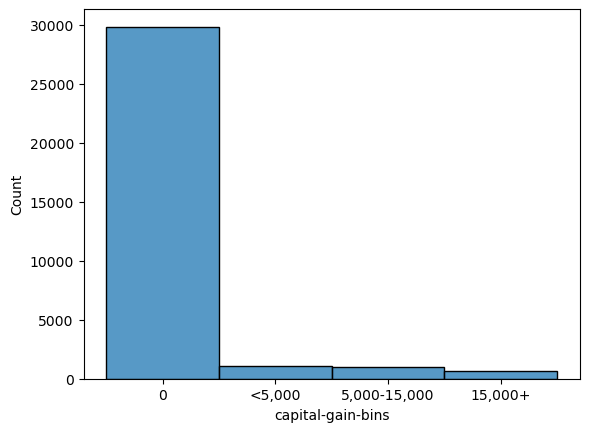

In [220]:
data['capital-gain-bins'] = pd.cut(
    data['capital-gain'], 
    bins=[-1, 0, 5000, 15000, data['capital-gain'].max()],  
    labels=["0", "<5,000", "5,000-15,000", "15,000+"],
    include_lowest=True
)

print(data['capital-gain-bins'])

sns.histplot(data['capital-gain-bins'])
plt.show()

In [230]:
print(data['age'].min())

17


0        41-50
1        26-40
2        51-65
3        26-40
4        26-40
         ...  
32555    26-40
32556    26-40
32557    51-65
32558    21-25
32559    51-65
Name: age-bins, Length: 32560, dtype: category
Categories (6, object): ['17-20' < '21-25' < '26-40' < '41-50' < '51-65' < '65+']


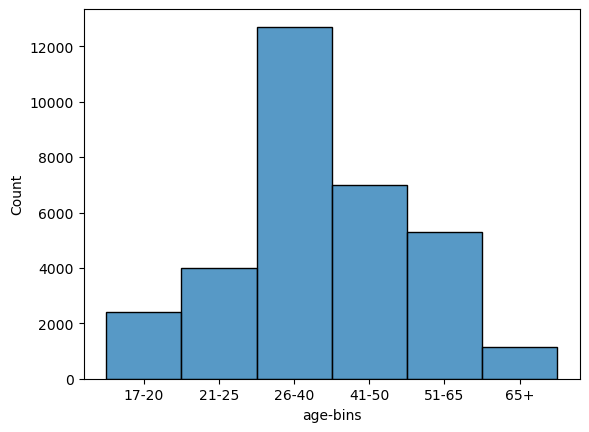

In [231]:
data['age-bins'] = pd.qcut(data['age'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])


data['age-bins'] = pd.cut(
    data['age'], 
    bins=[0, 20, 25, 40, 50, 65, data['age'].max()],  
    labels=["17-20", "21-25", "26-40", "41-50", "51-65", "65+"],
    include_lowest=True  # Ensures 0 is included
)

print(data['age-bins'])

sns.histplot(data['age-bins'])
plt.show()

hours-per-week-bins
26-40 hrs    19036
41-50 hrs     5938
50+ hrs       3643
11-25 hrs     3207
0-10 hrs       736
Name: count, dtype: int64


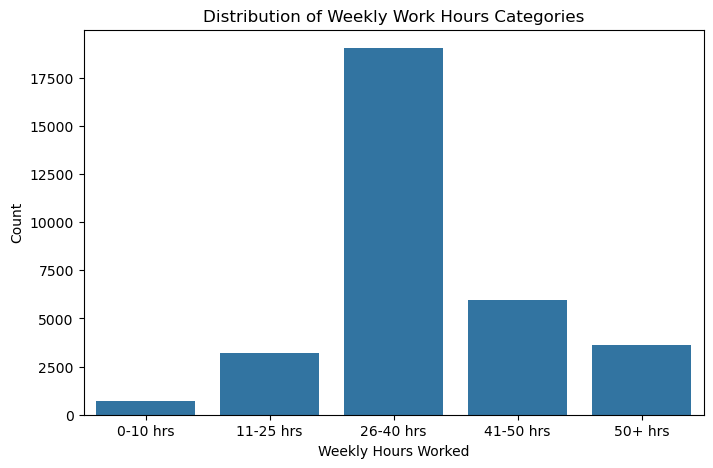

In [232]:
# Define bin ranges with an additional category for >50 hours
data['hours-per-week-bins'] = pd.cut(
    data['hours-per-week'], 
    bins=[0, 10, 25, 40, 50, data['hours-per-week'].max()],  
    labels=["0-10 hrs", "11-25 hrs", "26-40 hrs", "41-50 hrs", "50+ hrs"],
    include_lowest=True  # Ensures 0 is included
)

# Print category counts
print(data['hours-per-week-bins'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x=data['hours-per-week-bins'], order=["0-10 hrs", "11-25 hrs", "26-40 hrs", "41-50 hrs", "50+ hrs"])
plt.xlabel("Weekly Hours Worked")
plt.ylabel("Count")
plt.title("Distribution of Weekly Work Hours Categories")
plt.show()




10 Positive Factors
marital-status_Married-civ-spouse    0.444688
capital-gain-bins_5,000-15,000       0.262757
capital-gain-bins_15,000+            0.241721
sex_Male                             0.215995
occupation_Exec-managerial           0.214856
occupation_Prof-specialty            0.185861
education_grouped_Bachelors          0.180539
education_grouped_Masters            0.174567
hours-per-week-bins_41-50 hrs        0.171509
age-bins_41-50                       0.170340
Name: salary_numeric, dtype: float64

10 Negative Factors
marital-status_Never-married             -0.318427
relationship_Own-child                   -0.228541
relationship_Not-in-family               -0.188477
age-bins_21-25                           -0.186302
occupation_Other-service                 -0.156355
relationship_Unmarried                   -0.142864
hours-per-week-bins_11-25 hrs            -0.139399
education_grouped_High School Graduate   -0.131202
hours-per-week-bins_26-40 hrs            -0.125091
ra

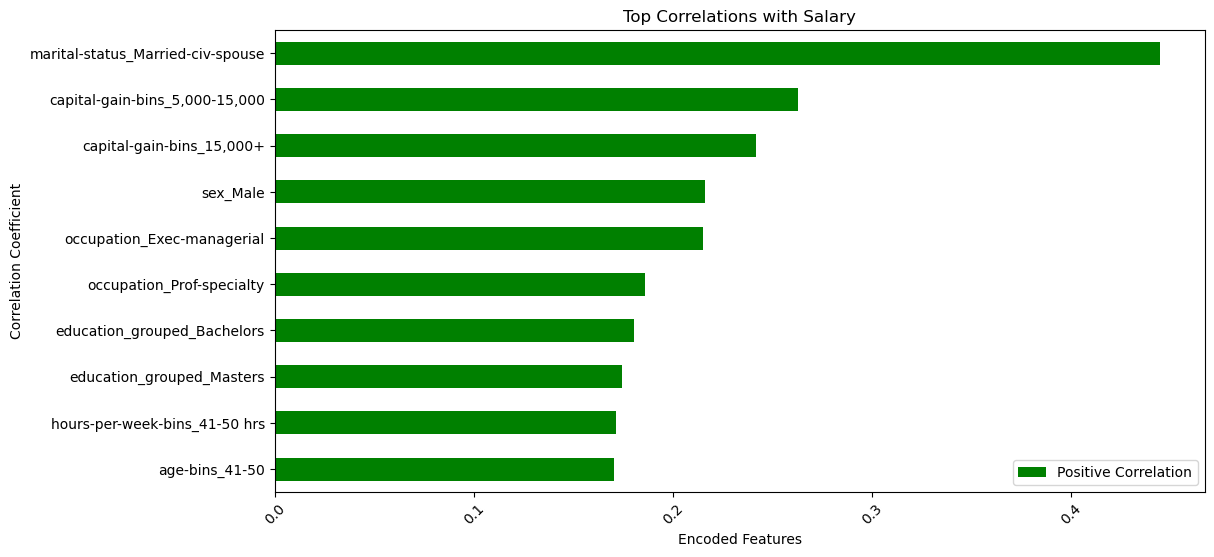

In [233]:
data_onehot_prep_2 = data.drop(columns=['education-num', 'education','age','capital-gain','hours-per-week']).copy()
data_onehot_prep_2 = data_onehot_prep_2.drop(columns=['age', 'capital-gain', 'hours-per-week'], errors='ignore')

encoded_data_onehot_2 = pd.get_dummies(data_onehot_prep_2, drop_first=True)


# Compute correlation with salary
salary_corr = encoded_data_onehot_2.corr()['salary_numeric'].sort_values(ascending=False).copy()

print("\n10 Positive Factors")
pos = salary_corr.drop("salary_numeric").drop(["salary_>50K"]).nlargest(10).sort_values(ascending=False)
pos.columns=['Variable','Correlation']

print(pos)


print("\n10 Negative Factors")
neg = salary_corr.drop("salary_numeric").drop(["salary_>50K"]).nsmallest(10)
neg.columns=['Variable','Correlation']

print(neg)


# Plot top 10 positive & negative correlations
plt.figure(figsize=(12, 6))

salary_corr.drop("salary_numeric").drop("salary_>50K").nlargest(10).sort_values(ascending=True).plot(kind='barh', color='green', label='Positive Correlation')

# Improve layout
# plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.title("Top Correlations with Salary")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Encoded Features")
plt.xticks(rotation=45)
plt.show()



/var/folders/1b/6lryqhs14m71h3pjsfcc6fdw0000gn/T/ipykernel_25097/633259836.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corr, y="Feature", x="Correlation", palette="coolwarm")


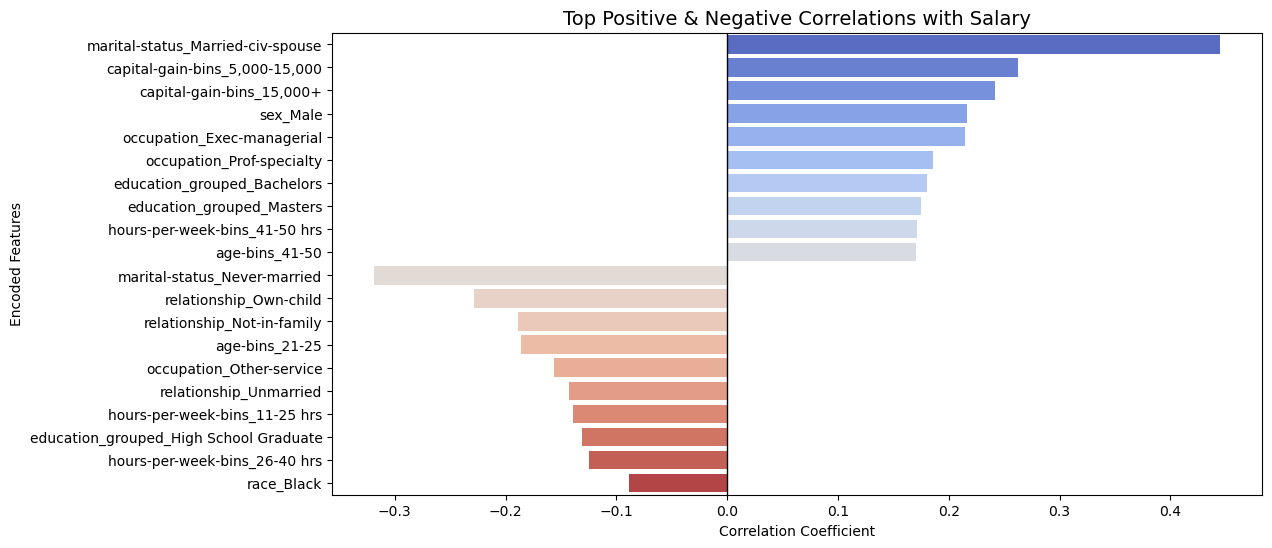

In [234]:
# Prepare Data for Seaborn
top_pos = salary_corr.drop(["salary_numeric", "salary_>50K"]).nlargest(10).reset_index()
top_neg = salary_corr.drop(["salary_numeric", "salary_>50K"]).nsmallest(10).reset_index()

# Rename columns for clarity
top_pos.columns = ["Feature", "Correlation"]
top_neg.columns = ["Feature", "Correlation"]

# Merge both positive and negative into one DataFrame for visualization
top_corr = pd.concat([top_pos, top_neg], axis=0)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_corr, y="Feature", x="Correlation", palette="coolwarm")

# Improve layout
plt.axvline(0, color='black', linewidth=1)  # Zero reference line
plt.title("Top Positive & Negative Correlations with Salary", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Encoded Features")
plt.show()

In [235]:
print(set(["age", "capital-gain", "hours-per-week"]) & set(encoded_data_onehot_2.columns))

set()


In [236]:
print(set(["age", "capital-gain", "hours-per-week"]) & set(encoded_data_onehot_2.columns))

set()


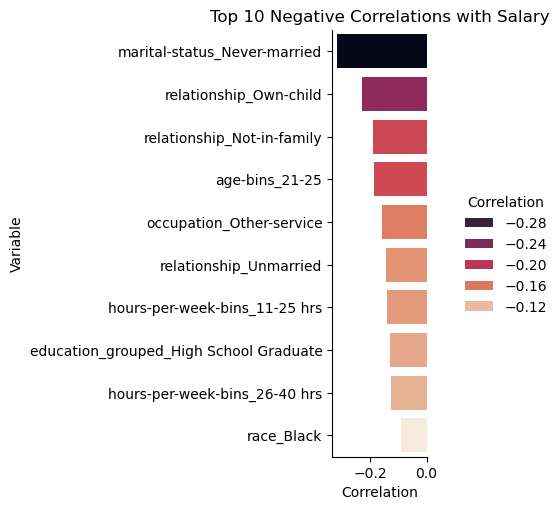

In [237]:
# salary_corr.drop("salary_numeric").nsmallest(10).plot(kind='bar', color='red', label='Negative Correlation')

# Convert Series to DataFrame with proper column names
salary_corr_df = salary_corr.drop("salary_numeric").nsmallest(10).reset_index()
salary_corr_df.columns = ["Variable", "Correlation"]

# Use bar plot instead of count plot
sns.catplot(data=salary_corr_df, x="Correlation", y="Variable", kind="bar", hue='Correlation', palette='rocket')
plt.title("Top 10 Negative Correlations with Salary")
plt.show()

In [238]:
print(data.columns) #We have age(numerical), marital-status(categorical), and sex (categorical)
print(data['relationship'].value_counts())

#we also have age-bins (categorical)
print(data['marital-status'].value_counts())
print(data['age-bins'].value_counts())

print(data['age'].value_counts())



Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary',
       'salary_numeric', 'education_grouped', 'capital-gain-bins', 'age-bins',
       'hours-per-week-bins'],
      dtype='object')
relationship
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
age-bins
26-40    12706
41-50     6983
51-65     5302
21-25     4001
17-20     2410
65+       1158
Name: count, dtype: int64
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85    

/var/folders/1b/6lryqhs14m71h3pjsfcc6fdw0000gn/T/ipykernel_25097/1869314599.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(values="salary_numeric", index="age-bins", columns="marital-status", aggfunc="mean")


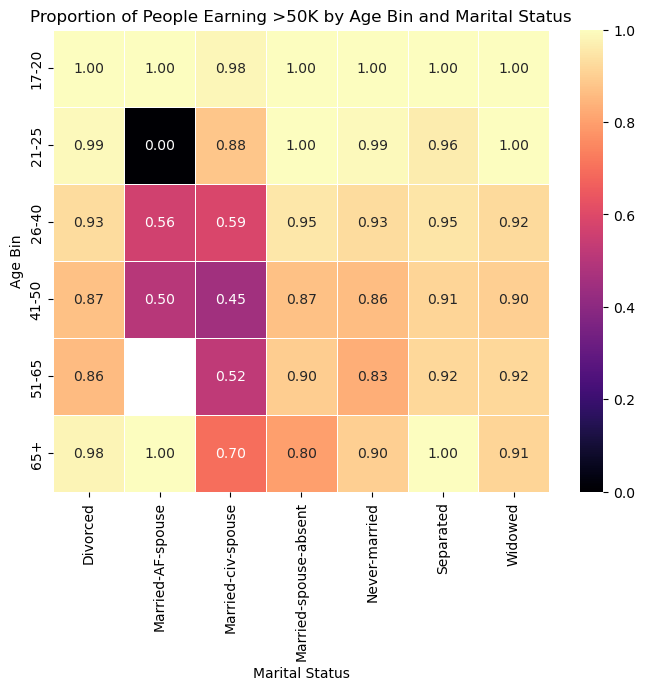

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data['salary_numeric'] = data['salary'].map({'>50K': 1, '<=50K': 0})

# Pivot the data to get proportions of Salary ≥50K per category
heatmap_data = data.pivot_table(values="salary_numeric", index="age-bins", columns="marital-status", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Proportion of People Earning >50K by Age Bin and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Age Bin")
plt.show()

In [244]:
# print(data.loc[(data.loc['age-bins']=='21-25') and (data.loc['marital-status']=='Married-AF-spouse')])
print(data.loc[(data['age-bins'] == '21-25') & (data['marital-status'] == 'Married-AF-spouse')])

       age workclass     education  education-num     marital-status  \
15364   24   Private     Bachelors             13  Married-AF-spouse   
29888   22   Private  Some-college             10  Married-AF-spouse   

           occupation relationship   race     sex  capital-gain  capital-loss  \
15364  Prof-specialty         Wife  White  Female             0             0   
29888   Other-service         Wife  White  Female             0             0   

       hours-per-week native-country salary  salary_numeric education_grouped  \
15364              40  United-States   >50K               1         Bachelors   
29888              40  United-States   >50K               1      Some College   

      capital-gain-bins age-bins hours-per-week-bins  
15364                 0    21-25           26-40 hrs  
29888                 0    21-25           26-40 hrs  


/var/folders/1b/6lryqhs14m71h3pjsfcc6fdw0000gn/T/ipykernel_25097/4285353836.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(values="salary_numeric", index="age-bins", columns="marital-status", aggfunc="mean")


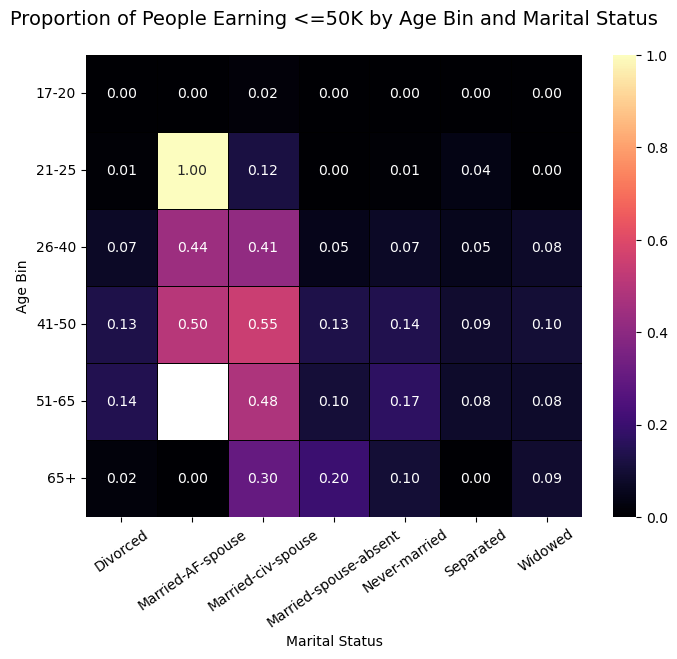

In [307]:
data['salary_numeric'] = data['salary'].map({'>50K': 1, '<=50K': 0})

# Pivot the data to get proportions of Salary ≥50K per category
heatmap_data = data.pivot_table(values="salary_numeric", index="age-bins", columns="marital-status", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(8, 6))
# heatmap_data = np.log1p(heatmap_data)  # Apply log scaling

sns.heatmap(heatmap_data, annot=True, cmap="magma", fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, linecolor='black')
plt.title("Proportion of People Earning <=50K by Age Bin and Marital Status\n", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Age Bin")
plt.xticks(rotation=35)
plt.yticks(rotation=0)  # Keep y-axis readable
plt.show()

In [248]:
data['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

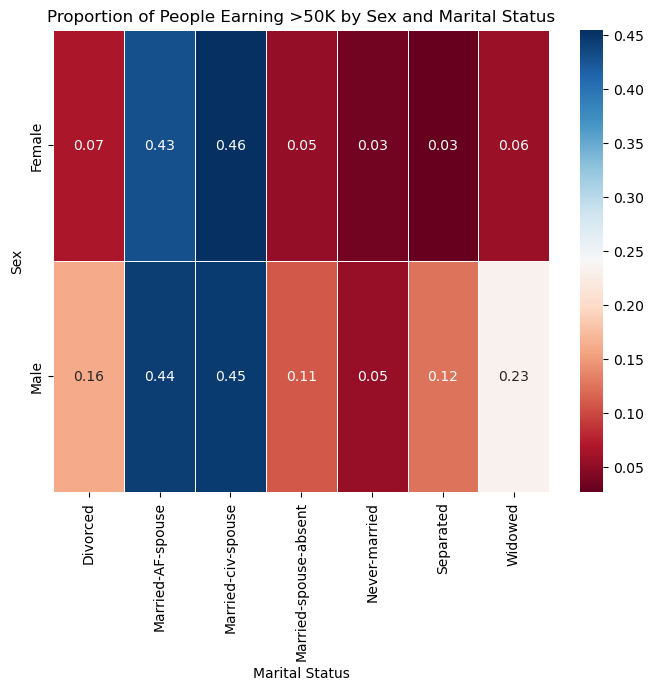

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['salary_numeric'] = data['salary'].map({'>50K': 1, '<=50K': 0})

# Pivot the data to get proportions of Salary ≥50K per category
heatmap_data = data.pivot_table(values="salary_numeric", index="sex", columns="marital-status", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)
plt.title("Proportion of People Earning >50K by Sex and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Sex")
plt.show()

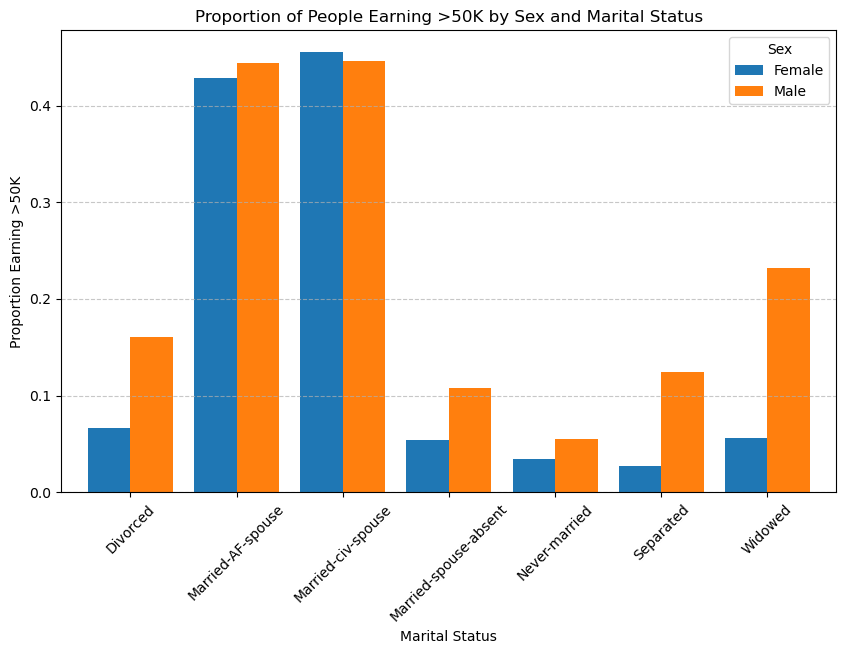

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute proportions
bar_data = data.groupby(["marital-status", "sex"])["salary_numeric"].mean().unstack()

# Plot grouped bar chart
bar_data.plot(kind="bar", figsize=(10, 6), width=0.8)
plt.title("Proportion of People Earning >50K by Sex and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion Earning >50K")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

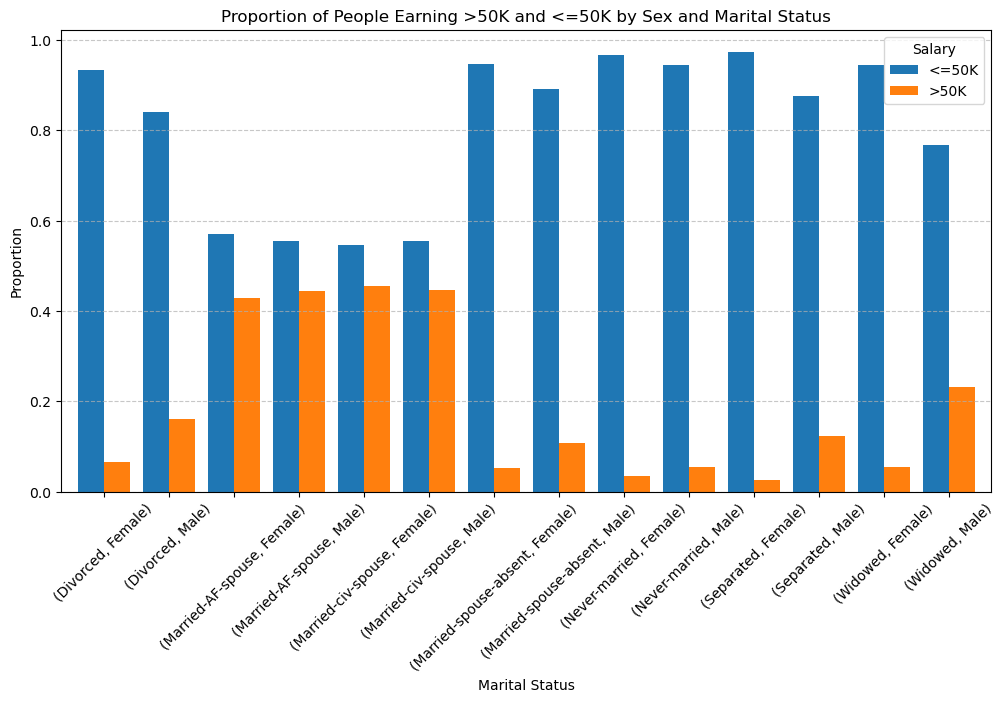

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute proportions based on marital-status, sex, and salary
bar_data = data.groupby(["marital-status", "sex", "salary"])["salary_numeric"].count().unstack()

# Normalize to get proportions
bar_data = bar_data.div(bar_data.sum(axis=1), axis=0)

# Plot grouped bar chart
bar_data.plot(kind="bar", figsize=(12, 6), width=0.8)

plt.title("Proportion of People Earning >50K and <=50K by Sex and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Salary")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()